In [1]:
import pandas as pd
import pyreadstat
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_spss('E:/MPMD/Second semester/Data Mining/VL_MPMD_Data_Mining_Summer_2021/00 Assignment/secom_mod.SAV')

In [3]:
df.set_index('ID',inplace=True)

In [9]:
df.tail()

,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
1563.0,0.0,16/10/2008 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1564.0,0.0,16/10/2008 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1565.0,0.0,17/10/2008 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1566.0,0.0,17/10/2008 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941
1567.0,0.0,17/10/2008 06:07:00,2944.92,2450.76,2195.4444,2914.1792,1.5978,100.0,85.1011,0.1235,...,0.0045,137.7844,0.4987,0.0181,0.0040,3.6275,0.0117,0.0162,0.0045,137.7844


In [10]:
df.shape

(1567, 592)

In [6]:
df.isnull().any()

ID            False
class         False
timestamp     False
feature001     True
feature002     True
              ...  
feature586     True
feature587     True
feature588     True
feature589     True
feature590     True
Length: 593, dtype: bool

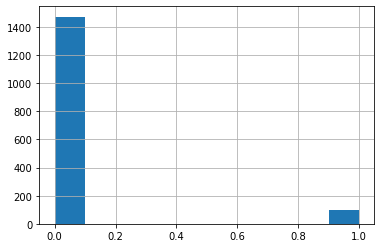

In [21]:
df['class'].hist()

In [23]:
df['class'].value_counts()

0.0    1472
1.0      95
Name: class, dtype: int64

### as we can see, the classes (target variable) is not equally distributed so we need to use SMOTE technique!

In [9]:
df.isnull().sum(axis = 0)

ID            0
class         0
timestamp     0
feature001    6
feature002    7
             ..
feature586    1
feature587    1
feature588    1
feature589    1
feature590    1
Length: 593, dtype: int64

In [10]:
df.isnull().sum(axis = 1)

0        44
1        36
2        20
3        20
4        40
       ... 
1562     52
1563     52
1564    148
1565     60
1566    152
Length: 1567, dtype: int64

In [14]:
df.isnull().values.sum()

41951

In [21]:
len(np.unique(df['feature006']))==1

False

In [19]:
len(np.unique(df['class']))==1

False

In [29]:
### 116 of the cols have only one values in them excluding Nan values, however 0 column have only one value if we count NaN as
### a seperate value.
len(df.columns[df.nunique() == 1])

116

In [34]:
len(df.columns[df.nunique(dropna=False) == 1])

0

In [25]:
### these cols have only one value and some NaNs!
df[df.columns[df.nunique() == 1]]

,feature006,feature014,feature043,feature050,feature053,feature070,feature098,feature142,feature150,feature179,...,feature530,feature531,feature532,feature533,feature534,feature535,feature536,feature537,feature538,feature539
ID,,,,,,,,,,,,,,,,,,,,,
1.0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563.0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1564.0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1565.0,100.0,NaN,70.0,1.0,0.0,1.0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.drop(df.columns[df.nunique() == 1],inplace=False)

KeyError: "['feature006' 'feature014' 'feature043' 'feature050' 'feature053'\n 'feature070' 'feature098' 'feature142' 'feature150' 'feature179'\n 'feature180' 'feature187' 'feature190' 'feature191' 'feature192'\n 'feature193' 'feature194' 'feature195' 'feature227' 'feature230'\n 'feature231' 'feature232' 'feature233' 'feature234' 'feature235'\n 'feature236' 'feature237' 'feature238' 'feature241' 'feature242'\n 'feature243' 'feature244' 'feature257' 'feature258' 'feature259'\n 'feature260' 'feature261' 'feature262' 'feature263' 'feature264'\n 'feature265' 'feature266' 'feature267' 'feature277' 'feature285'\n 'feature314' 'feature315' 'feature316' 'feature323' 'feature326'\n 'feature327' 'feature328' 'feature329' 'feature330' 'feature331'\n 'feature365' 'feature370' 'feature371' 'feature372' 'feature373'\n 'feature374' 'feature375' 'feature376' 'feature379' 'feature380'\n 'feature381' 'feature382' 'feature395' 'feature396' 'feature397'\n 'feature398' 'feature399' 'feature400' 'feature401' 'feature402'\n 'feature403' 'feature404' 'feature405' 'feature415' 'feature423'\n 'feature450' 'feature451' 'feature452' 'feature459' 'feature462'\n 'feature463' 'feature464' 'feature465' 'feature466' 'feature467'\n 'feature482' 'feature499' 'feature502' 'feature503' 'feature504'\n 'feature505' 'feature506' 'feature507' 'feature508' 'feature509'\n 'feature510' 'feature513' 'feature514' 'feature515' 'feature516'\n 'feature529' 'feature530' 'feature531' 'feature532' 'feature533'\n 'feature534' 'feature535' 'feature536' 'feature537' 'feature538'\n 'feature539'] not found in axis"

# It is a cllassification problem and maybe we can use SVM.